In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dadosgovbr-recursos.csv")

/home/chris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,10,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(34513, 29)

In [5]:
df.columns

Index(['Unnamed: 0', 'Descrição extendida', 'Fonte Gestora', 'Fonte Provedora',
       'cache_last_updated', 'cache_url', 'created', 'datastore_active',
       'description', 'format', 'hash', 'id', 'last_modified', 'mimetype',
       'mimetype_inner', 'name', 'package_id', 'platform', 'position',
       'resource_group', 'resource_group_id', 'resource_type', 'revision_id',
       'size', 'state', 'url', 'url_type', 'webstore_last_updated',
       'webstore_url'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Descrição extendida,Fonte Gestora,Fonte Provedora,cache_last_updated,cache_url,created,datastore_active,description,format,...,resource_group,resource_group_id,resource_type,revision_id,size,state,url,url_type,webstore_last_updated,webstore_url
0,0,NaN,NaN,NaN,NaN,NaN,2017-12-05T10:30:28.187456,False,Interface json do serviço BCData/SGS - Sistema...,JSON,...,NaN,NaN,NaN,c8c65b06-a069-4a27-886a-9a3b8c9df44c,NaN,active,http://api.bcb.gov.br/dados/serie/bcdata.sgs.1...,NaN,None,None
1,1,NaN,NaN,NaN,NaN,NaN,2017-12-05T10:30:28.187469,True,Interface csv do serviço BCData/SGS - Sistema ...,CSV,...,NaN,NaN,NaN,c8c65b06-a069-4a27-886a-9a3b8c9df44c,NaN,active,http://api.bcb.gov.br/dados/serie/bcdata.sgs.1...,NaN,None,None
2,2,NaN,NaN,NaN,NaN,NaN,2017-12-05T10:30:28.187472,False,Interface SOAP do Sistema Gerenciador de Série...,wsdl,...,NaN,NaN,NaN,c8c65b06-a069-4a27-886a-9a3b8c9df44c,NaN,active,https://www3.bcb.gov.br/sgspub/JSP/sgsgeral/Fa...,NaN,None,None
3,3,NaN,NaN,NaN,NaN,NaN,2017-12-05T10:30:28.187475,False,Acesso à visualização gráfica da série tempora...,HTML,...,NaN,NaN,NaN,c8c65b06-a069-4a27-886a-9a3b8c9df44c,NaN,active,https://www3.bcb.gov.br/sgspub/consultarvalore...,NaN,None,None
4,4,NaN,NaN,NaN,NaN,NaN,2017-12-05T10:30:28.183034,False,Interface json do serviço BCData/SGS - Sistema...,JSON,...,NaN,NaN,NaN,321f8aaa-ae3f-4389-abeb-c4226ccf1c3a,NaN,active,http://api.bcb.gov.br/dados/serie/bcdata.sgs.1...,NaN,None,None


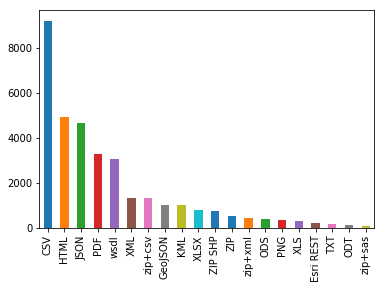

In [12]:
df.format.value_counts()[:20].plot.bar()

In [29]:
df.package_id.nunique()

6649

In [31]:
df.created = pd.to_datetime(df.created,infer_datetime_format=True)

In [39]:
df = df.set_index(df.created)

In [44]:
df_inserts = pd.DataFrame(df.groupby(df.index.date).count())

In [46]:
df_inserts["quantidade"] = df_inserts["Unnamed: 0"]

In [48]:
df_inserts = df_inserts[['quantidade']]

In [50]:
df_inserts.head()

,quantidade
2012-05-22,2
2012-06-15,1
2012-06-21,46
2012-06-25,15
2012-10-26,17


In [61]:
df_inserts['soma'] = df_inserts.quantidade.cumsum()

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
df_inserts.head()

,quantidade,soma
2012-05-22,2,2
2012-06-15,1,3
2012-06-21,46,49
2012-06-25,15,64
2012-10-26,17,81


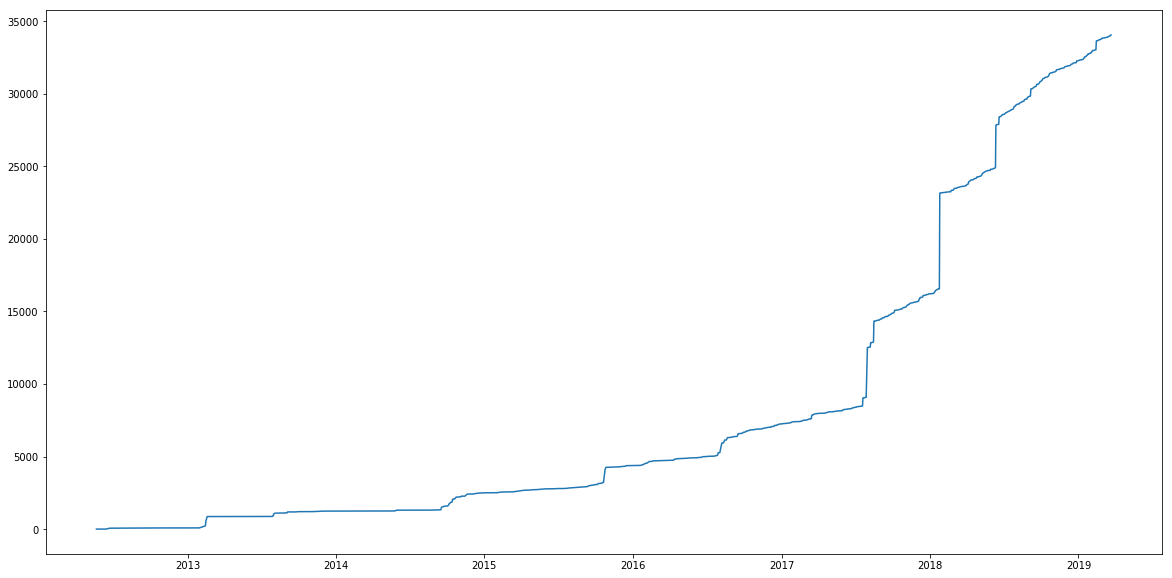

In [66]:
plt.figure(figsize=(20,10))
df_inserts.soma.plot.line()